<a href="https://colab.research.google.com/github/macedoestevaof/macedoestevaof/blob/main/Kickstarter_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About This Work

This dataset appears to be from two extractions of Kickstarter projects (https://www.kickstarter.com/) from 2016 and 2018. The 2018 dataset was chosen because the currencies are already converted.

Estevão Macedo used this for his final project in the course "Introduction to Data Science" (2023), part of the Master's Program in Complex Systems Modeling at the University of São Paulo.

Kickstarter is a crowdfunding platform where people can raise funds during a campaign period. The goal of this analysis is to predict successful and failed Kickstarter projects at the time of their campaign announcement.

The data is publicly available at: https://www.kaggle.com/datasets/kemical/kickstarter-projects

Thanks to Mickaël Mouillé for providing this dataset under the CC BY-NC-SA 4.0 license.

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# Importing Kickstarter Data

In [ ]:
# Load the data
df = pd.read_csv('/content/drive/MyDrive/Portfólio/Kickstarter/ks-projects-201801.csv')

# Analyzing column data types and missing values
df.info()

# Display the DataFrame
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


#Preliminary Data Cleaning

Dropping data that will not be useful


In [ ]:
# This analysis will consider only the features available at the time of the campaign announcement
df = df.drop(columns=['pledged', 'backers', 'usd pledged', 'usd_pledged_real', 'goal'])

# Convert the 'launched' column to datetime, coercing invalid formats to NaT
df['deadline'] = pd.to_datetime(df['deadline'], format='mixed', errors='coerce')

# Remove rows where 'launched' could not be parsed (NaT)
df = df[df['deadline'].notna()]


# Remove missing data
df = df.dropna()

# Analyzing column data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378657 entries, 0 to 378660
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             378657 non-null  int64         
 1   name           378657 non-null  object        
 2   category       378657 non-null  object        
 3   main_category  378657 non-null  object        
 4   currency       378657 non-null  object        
 5   deadline       378657 non-null  datetime64[ns]
 6   launched       378657 non-null  object        
 7   state          378657 non-null  object        
 8   country        378657 non-null  object        
 9   usd_goal_real  378657 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 31.8+ MB


# Type Attribution

Correcting the data types

In [ ]:
# Adjusting the features to the correct data types

# Remove undesired categories
df = df[~df['state'].isin(['canceled', 'live', 'suspended', 'undefined'])]

# Convert categorical values into boolean data
df.loc[df['state'] == 'failed', ['state']] = 0
df.loc[df['state'] == 'successful', ['state']] = 1

# Convert to a boolean type
df['state'] = df['state'].astype(bool)

df['ID'] = df['ID'].astype('object') # A record identifier
df['category'] = df['category'].astype('category') # Categorical data
df['main_category'] = df['main_category'].astype('category') # Categorical data
df['currency'] = df['currency'].astype('category') # Categorical data
df['deadline'] = pd.to_datetime(df['deadline']) # Date
df['launched'] = pd.to_datetime(df['launched']) # Date
df['country'] = df['country'].astype('category') # Categorical data

# Calculate the period during which the project was available
df['period'] = df['deadline'] - df['launched']

# Conversion to total days
df['period'] = df['period'].dt.days

# Feature representing the length of each project name
df['name_length'] = df['name'].astype(str).apply(len)

# Feature indicating whether each project name contains any digits
df['name_with_number'] = df['name'].astype(str).apply(lambda x: bool(re.search(r'\d', x)))

# Feature indicating whether each project name contains any special characters
df['name_with_special_char'] = df['name'].astype(str).apply(lambda x: bool(re.search(r'[^a-zA-Z0-9]', x)))

# Drop features that are no longer useful after extracting the period information
df = df.drop(columns=['name', 'deadline', 'launched'])

# Analyzing column data types and missing values
df.info()

# Prints summary statistics for numerical columns
print(df.describe())

df

<class 'pandas.core.frame.DataFrame'>
Index: 331672 entries, 0 to 378660
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   ID                      331672 non-null  object  
 1   category                331672 non-null  category
 2   main_category           331672 non-null  category
 3   currency                331672 non-null  category
 4   state                   331672 non-null  bool    
 5   country                 331672 non-null  category
 6   usd_goal_real           331672 non-null  float64 
 7   period                  331672 non-null  int64   
 8   name_length             331672 non-null  int64   
 9   name_with_number        331672 non-null  bool    
 10  name_with_special_char  331672 non-null  bool    
dtypes: bool(3), category(4), float64(1), int64(2), object(1)
memory usage: 15.2+ MB
       usd_goal_real         period    name_length
count   3.316720e+05  331672.000000  331672

,ID,category,main_category,currency,state,country,usd_goal_real,period,name_length,name_with_number,name_with_special_char
0,1000002330,Poetry,Publishing,GBP,False,GB,1533.95,58,31,False,True
1,1000003930,Narrative Film,Film & Video,USD,False,US,30000.00,59,45,False,True
2,1000004038,Narrative Film,Film & Video,USD,False,US,45000.00,44,14,False,True
3,1000007540,Music,Music,USD,False,US,5000.00,29,49,False,True
5,1000014025,Restaurants,Food,USD,True,US,50000.00,34,20,False,True
...,...,...,...,...,...,...,...,...,...,...,...
378654,999975836,Small Batch,Food,USD,False,US,6500.00,29,37,False,True
378657,999977640,Narrative Film,Film & Video,USD,False,US,1500.00,26,9,False,True
378658,999986353,Narrative Film,Film & Video,USD,False,US,15000.00,45,71,False,True
378659,999987933,Technology,Technology,USD,False,US,15000.00,30,24,False,True


# Filtering Out Likely Test Campaigns in a Dataset

In [ ]:
# Select campaigns that lasted more than 1 day
df = df[df['period'] > 1]

# Select campaigns with a funding goal greater than $100
df = df[df['usd_goal_real'] > 100]

# Exploratory Data Analysis

Creating analysis functions

In [ ]:
# Function to plot the distribution of a numerical variable
def plot_distribution(df, variable):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[variable], bins=30, kde=True)
    plt.title(f'Distribution of {variable}')
    plt.xlabel(f'Number of {variable}')
    plt.ylabel('Frequency')
    plt.show()

# Function to create a box plot for a given variable
def plot_boxplot(df, variable):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[variable])
    plt.title(f'Box Plot of {variable}')
    plt.show()

# Function to plot the distribution of a boolean (binary) variable
def plot_boolean_distribution(df, variable):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x=variable, order=[False, True])
    plt.title(f'Distribution of {variable}')
    plt.xlabel(f'Number of {variable}')
    plt.ylabel('Frequency')

    # Add percentage labels above each bar
    for p in ax.patches:
        count = (float(p.get_height()) / df[variable].count()) * 100.0
        ax.annotate(f'{count:,.2f} %',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=11, color='black')
    plt.show()

# Function to display descriptive statistics for a numerical array or Series
def show_descriptive_statistics(data):
    mean = np.mean(data)
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    range_ = np.ptp(data)
    min_ = data.min()
    max_ = data.max()
    std_dev = np.std(data, ddof=1)
    variance = np.var(data, ddof=1)
    cv = (std_dev / mean) * 100 if mean != 0 else np.nan
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    print(f"Mean: {mean:.2f}")
    print(f"Median: {median:.2f}")
    print(f"Mode: {mode:.2f}")
    print(f"Range: {range_:.2f}")
    print("Minimum:", min_)
    print("Maximum:", max_)
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"Variance: {variance:.2f}")
    print(f"Coefficient of Variation (CV): {cv:.2f}%")
    print(f"Interquartile Range (IQR): {iqr:.2f}")

# Function to plot the distribution of categories from a semicolon-separated string column
def show_categories(df, variable):
    df_categories = df[variable].str.split('; ', expand=True).stack().reset_index(drop=True)
    list_df_categories = df_categories.value_counts().sort_values(ascending=False).iloc[:]
    num_categories = len(list_df_categories)
    height = max(4, min(num_categories * 0.3, 30))
    plt.figure(figsize=(15, height))
    axG = sns.barplot(x=list_df_categories.values, y=list_df_categories.index)
    plt.title(f'Distribution of {variable}')
    plt.xlabel('Count')
    plt.ylabel(f'{variable}')

    # Add count labels to each bar
    for p in axG.patches:
        axG.annotate(f'{p.get_width():,.0f}',
                    (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center')

    plt.show()

Analysis

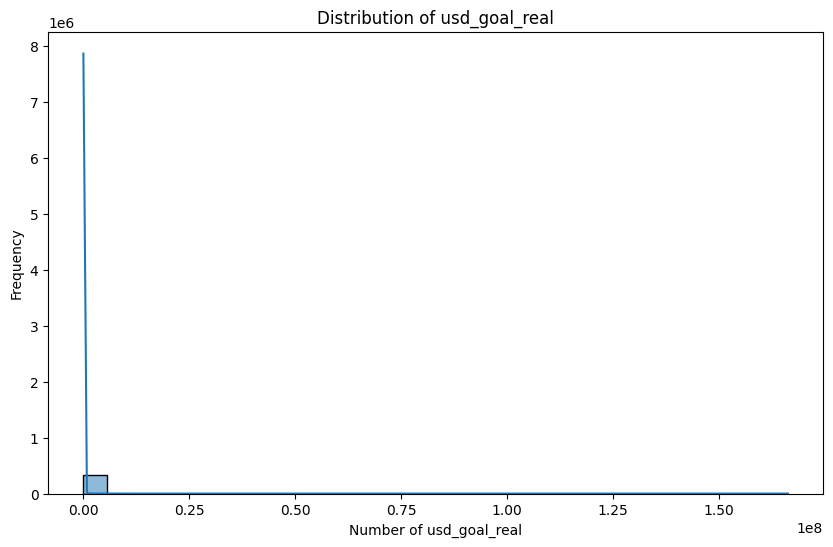

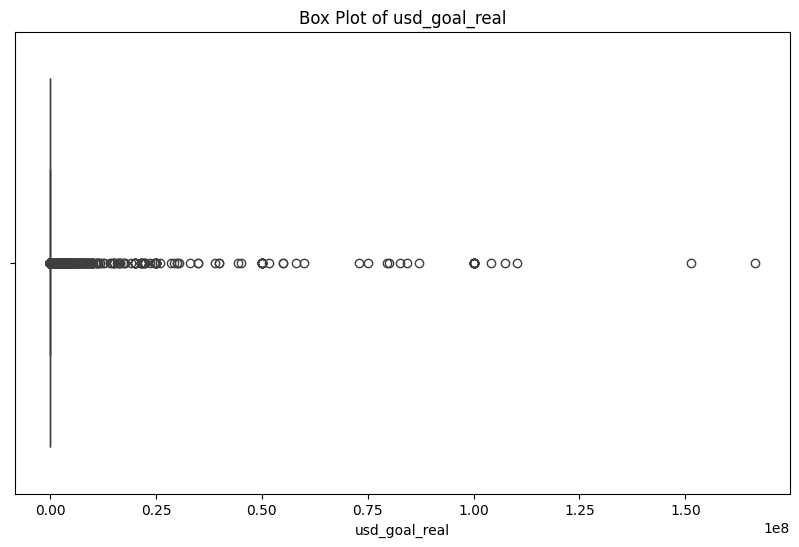

Mean: 41855.24
Median: 5175.65
Mode: 5000.00
Range: 166361290.67
Minimum: 100.04
Maximum: 166361390.71
Standard Deviation: 1104202.47
Variance: 1219263095254.25
Coefficient of Variation (CV): 2638.15%
Interquartile Range (IQR): 13000.00


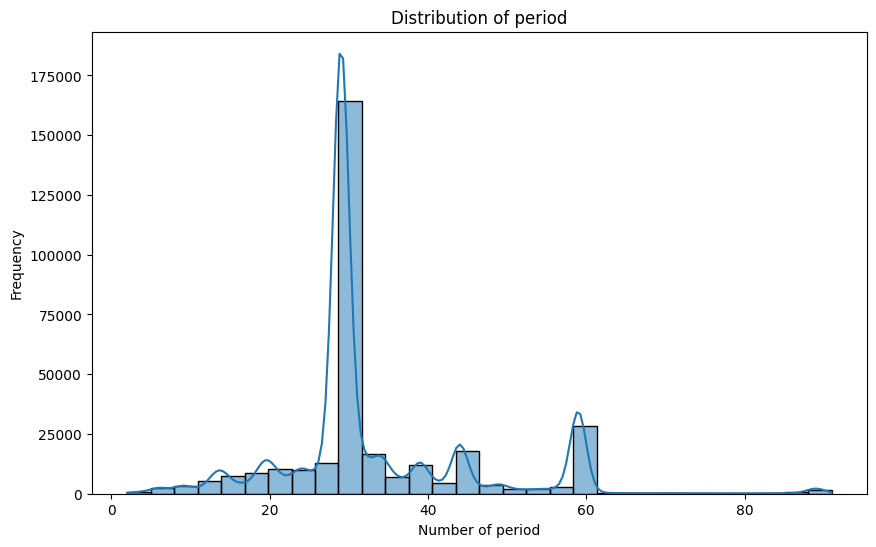

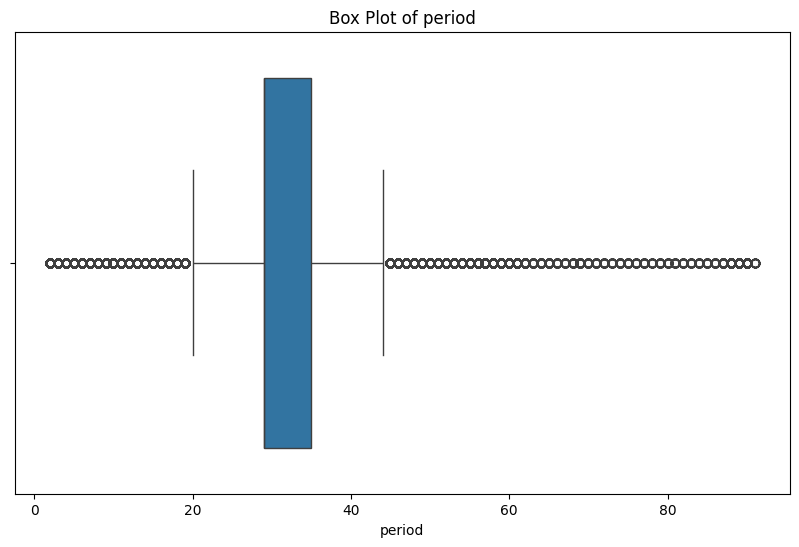

Mean: 33.07
Median: 29.00
Mode: 29.00
Range: 89.00
Minimum: 2
Maximum: 91
Standard Deviation: 12.66
Variance: 160.20
Coefficient of Variation (CV): 38.27%
Interquartile Range (IQR): 6.00


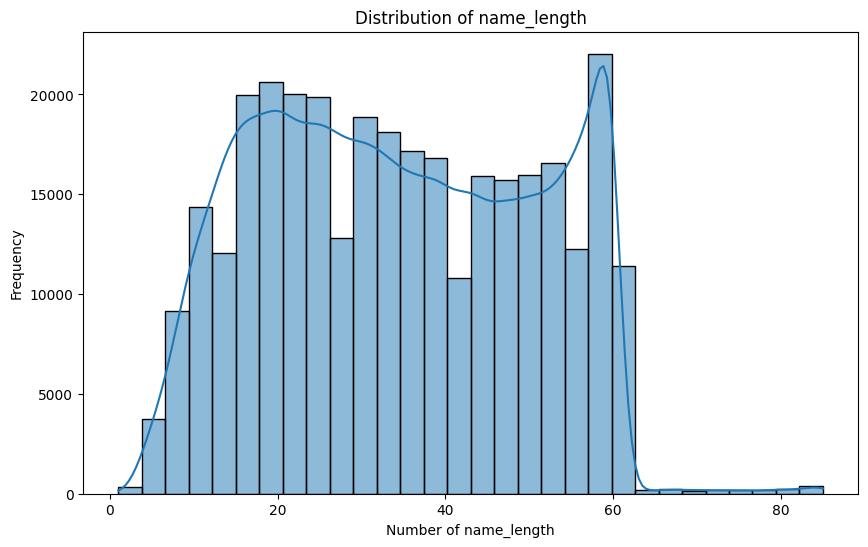

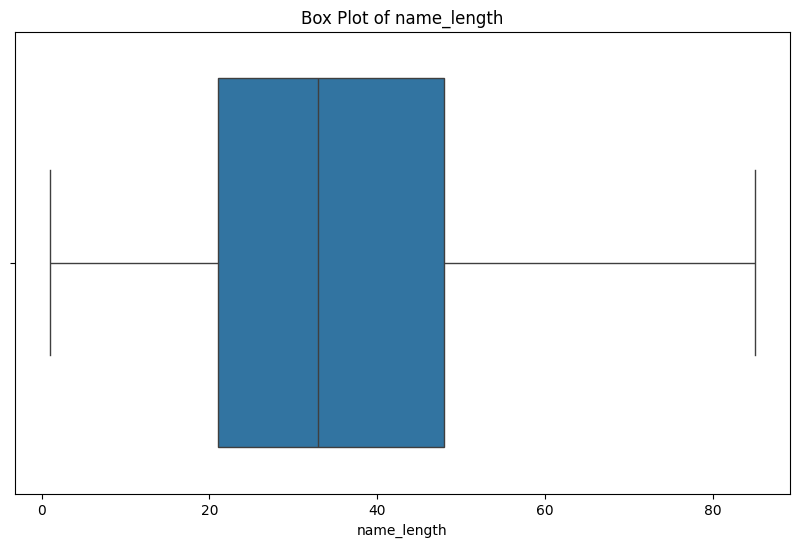

Mean: 34.29
Median: 33.00
Mode: 60.00
Range: 84.00
Minimum: 1
Maximum: 85
Standard Deviation: 15.97
Variance: 255.06
Coefficient of Variation (CV): 46.57%
Interquartile Range (IQR): 27.00


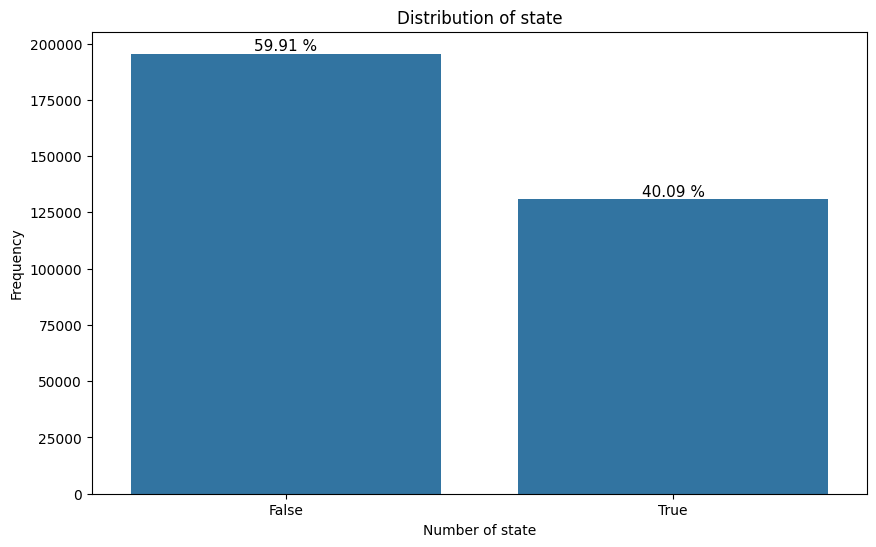

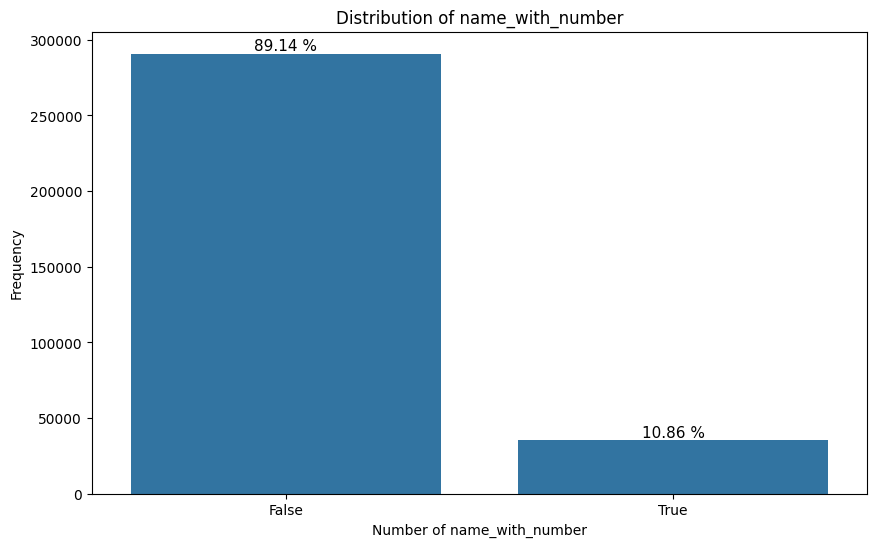

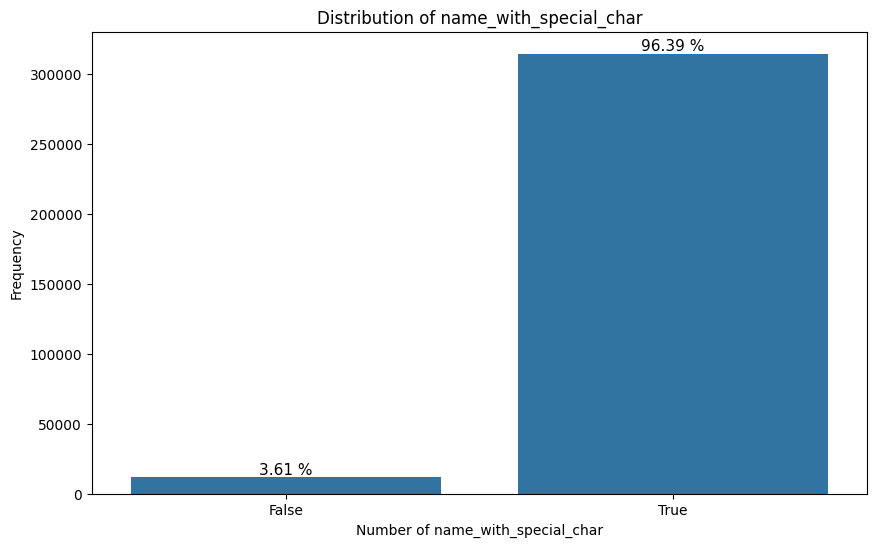

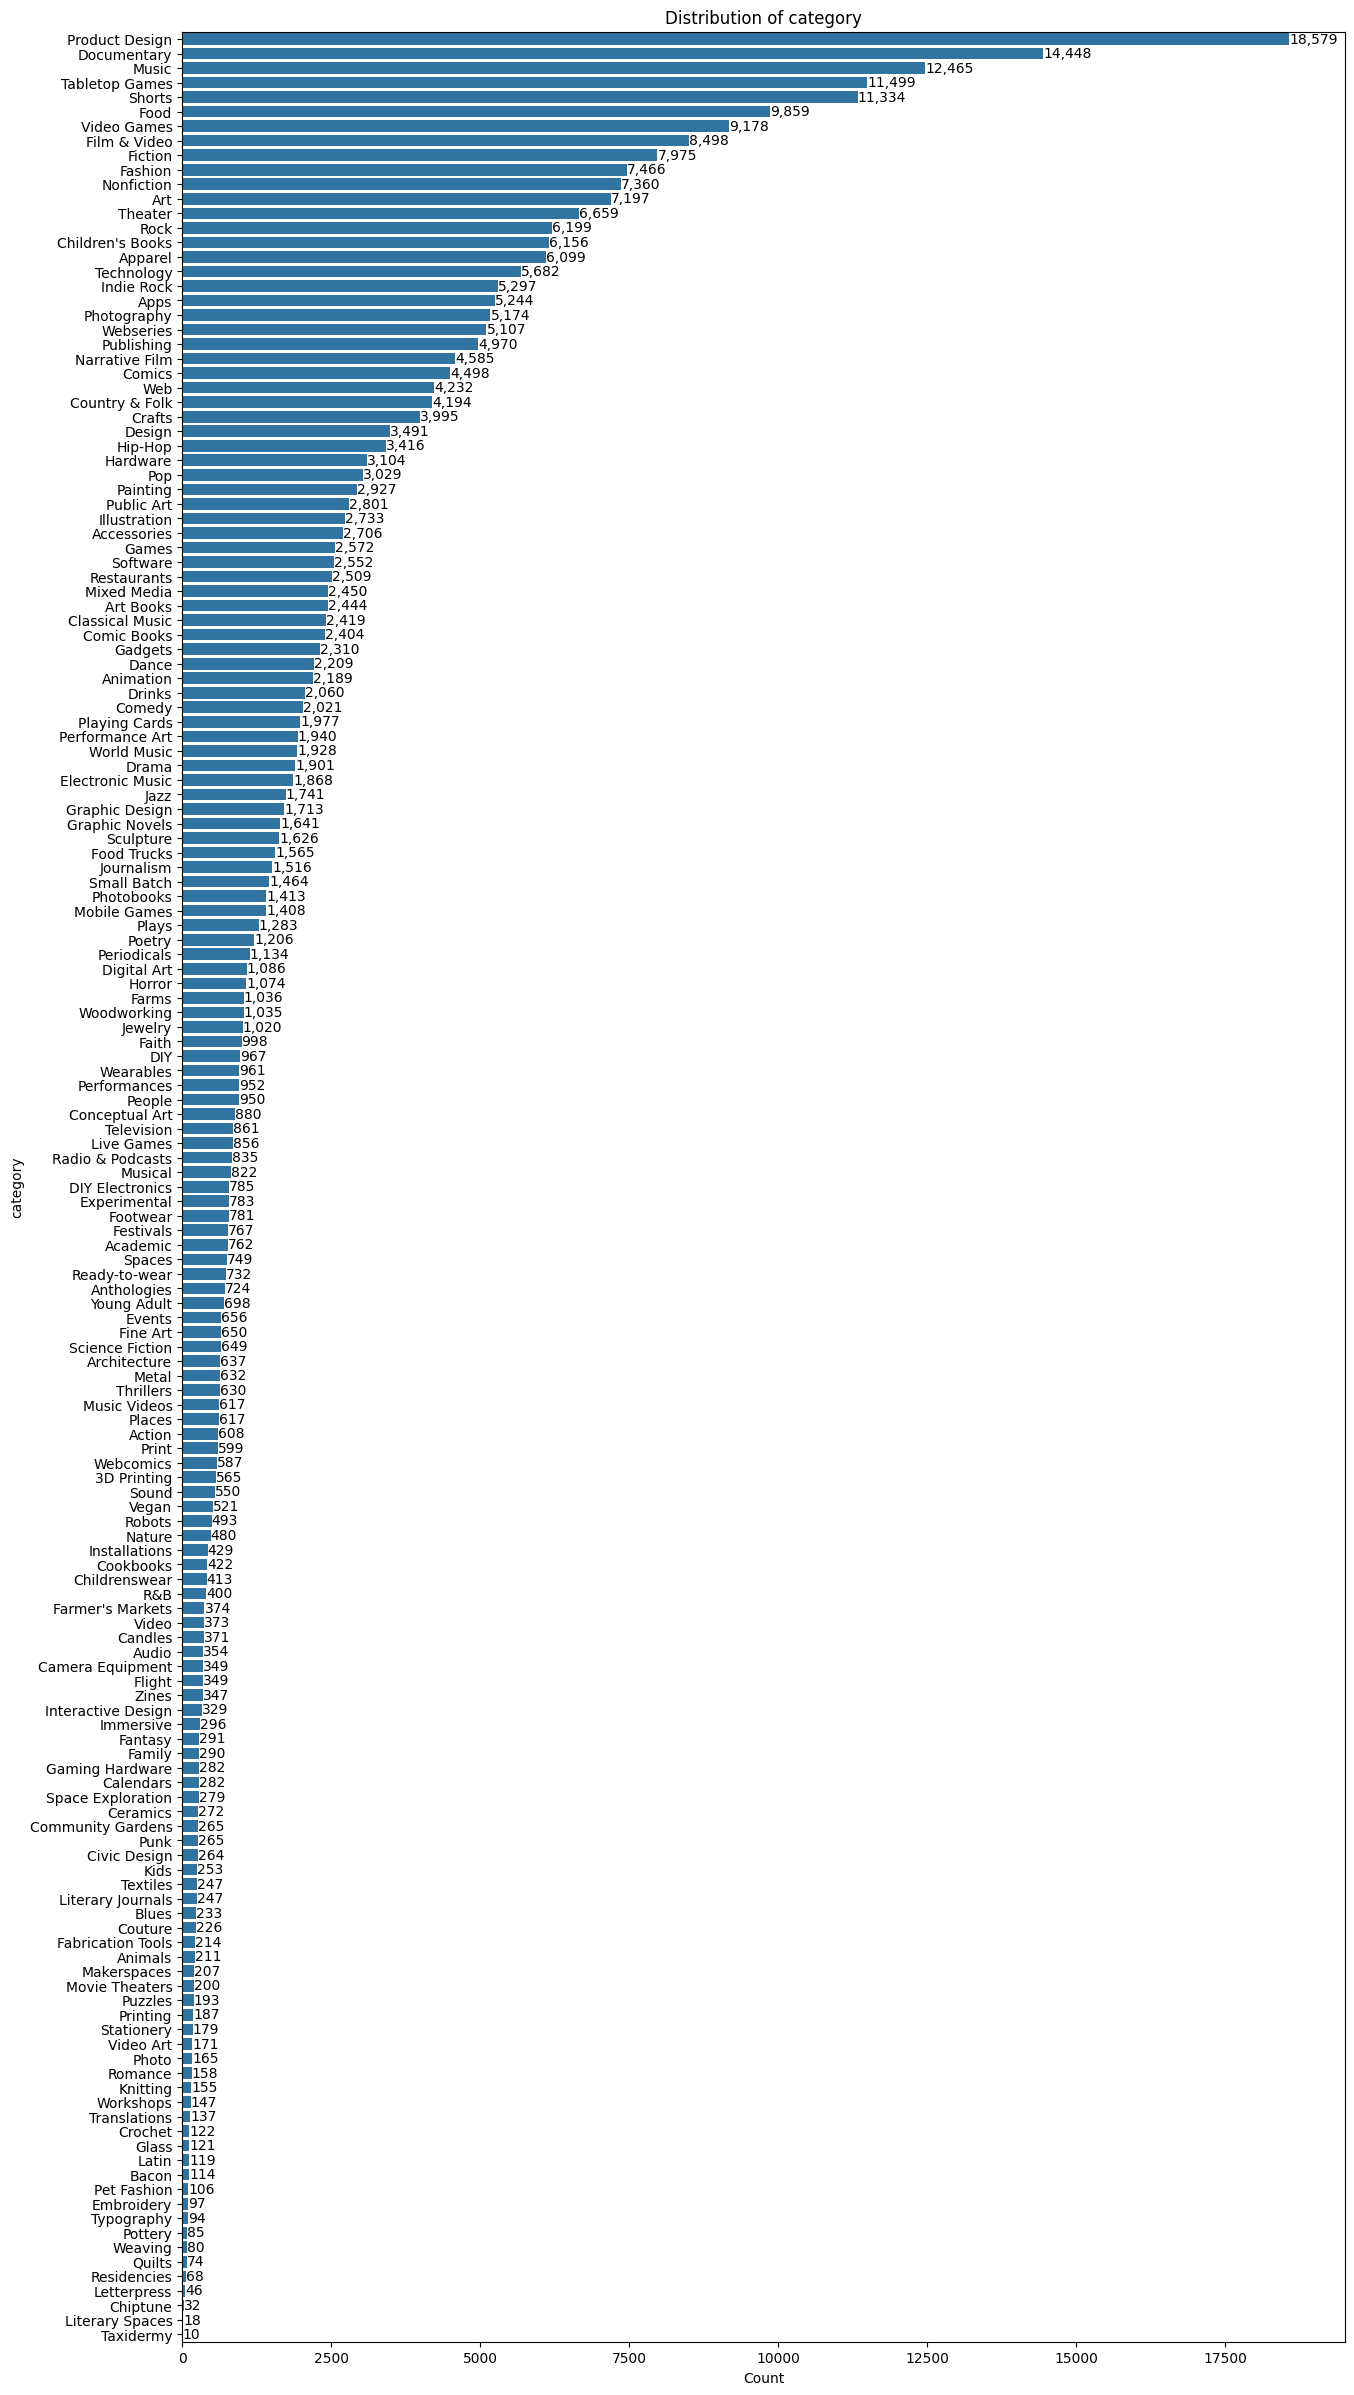

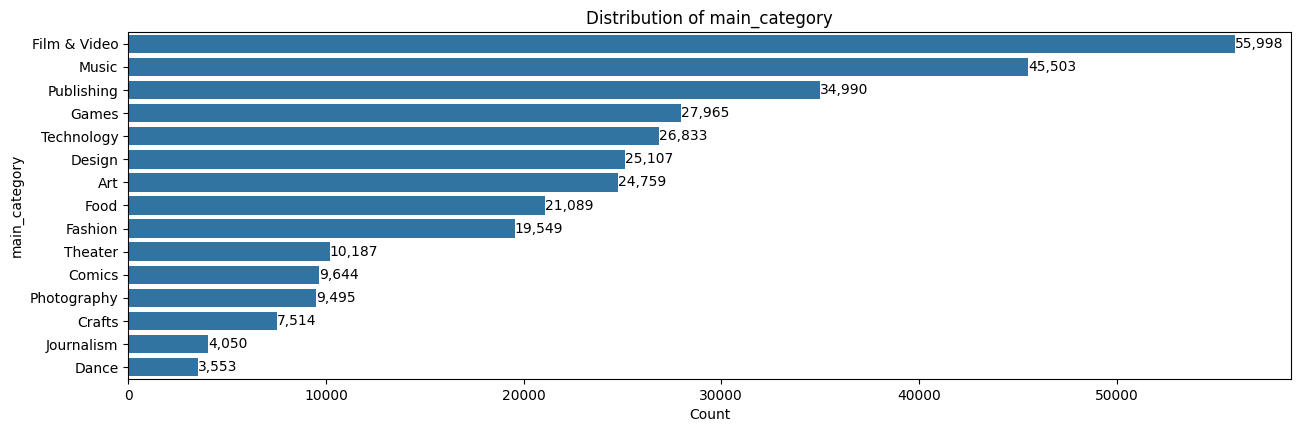

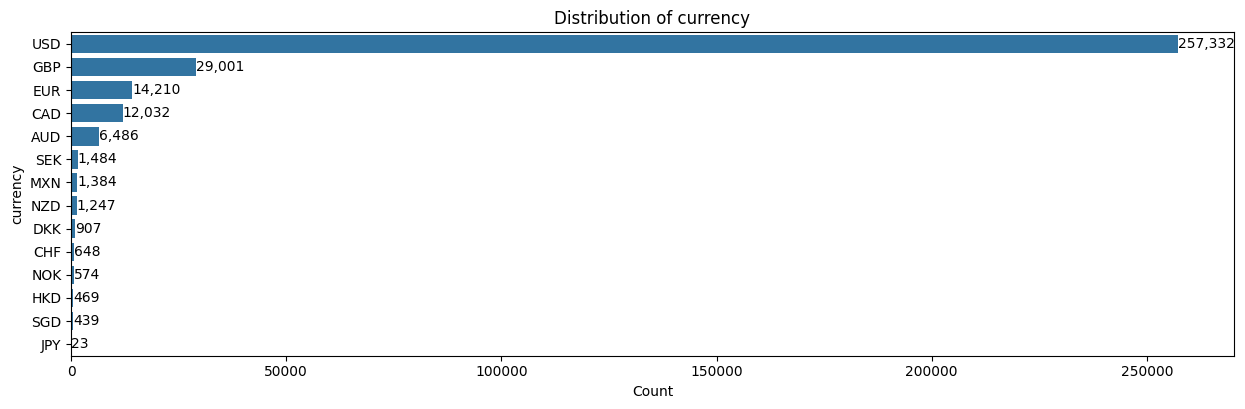

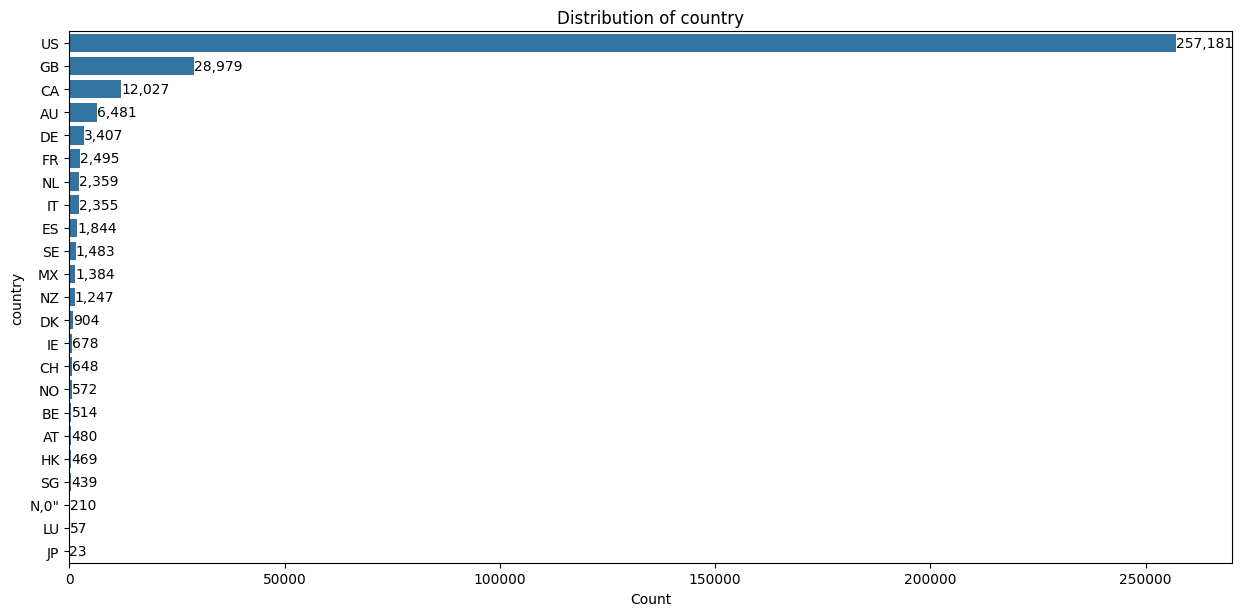

In [ ]:
categorical = [
    'category',
    'main_category',
    'currency',
    'country'
    ]

boolean = [
    'state',
    'name_with_number',
    'name_with_special_char'
    ]

numerical = [
    'usd_goal_real',
    'period',
    'name_length'
    ]


for feature in numerical:
  plot_distribution(df, feature)
  plot_boxplot(df, feature)
  show_descriptive_statistics(df[feature])

for feature in boolean:
  plot_boolean_distribution(df,feature)

for feature in categorical:
  show_categories(df,feature)


# Additional Filtering Post-Analysis

In [ ]:
# Remove strange information after analysis
df = df[~df['country'].isin(['N,0"'])]

# Remove goals very high (above $ 3.000.000)
df = df[~((df['usd_goal_real'] >= 3000000))]


# Transforming Data and Filtering Outliers

Transforming Data

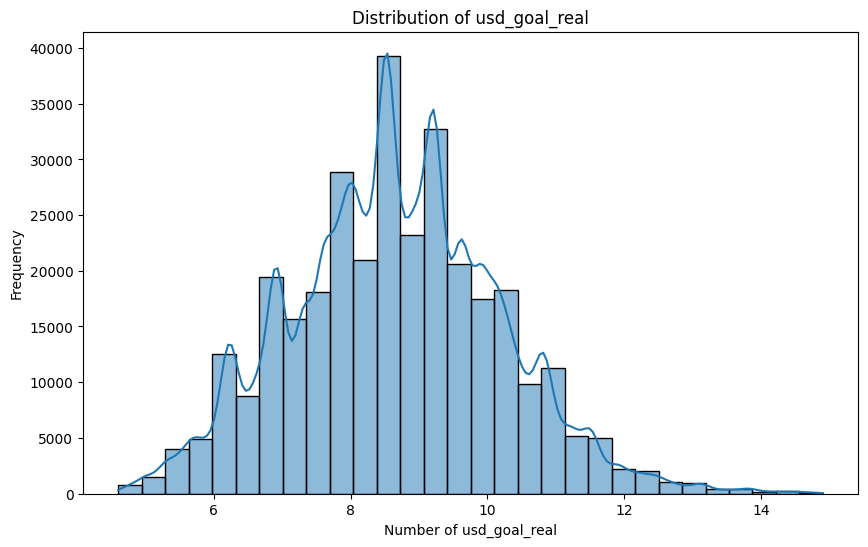

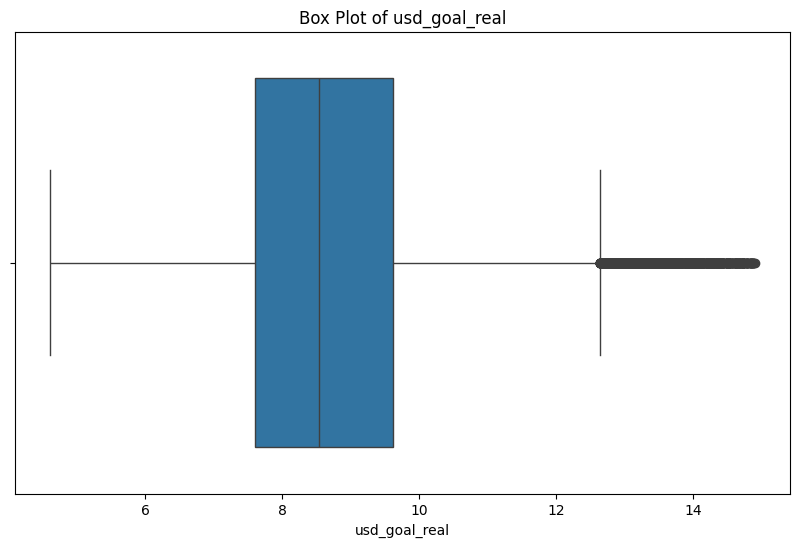

Mean: 8.66
Median: 8.54
Mode: 8.52
Range: 10.30
Minimum: 4.605570106009418
Maximum: 14.902960380807023
Standard Deviation: 1.53
Variance: 2.34
Coefficient of Variation (CV): 17.67%
Interquartile Range (IQR): 2.01


In [ ]:
# Transforming goal feature to reduce range
df['usd_goal_real'] = df['usd_goal_real'].apply(np.log)

# Showing the results
plot_distribution(df, 'usd_goal_real')
plot_boxplot(df, 'usd_goal_real')
show_descriptive_statistics(df['usd_goal_real'])

Filtering Outliers

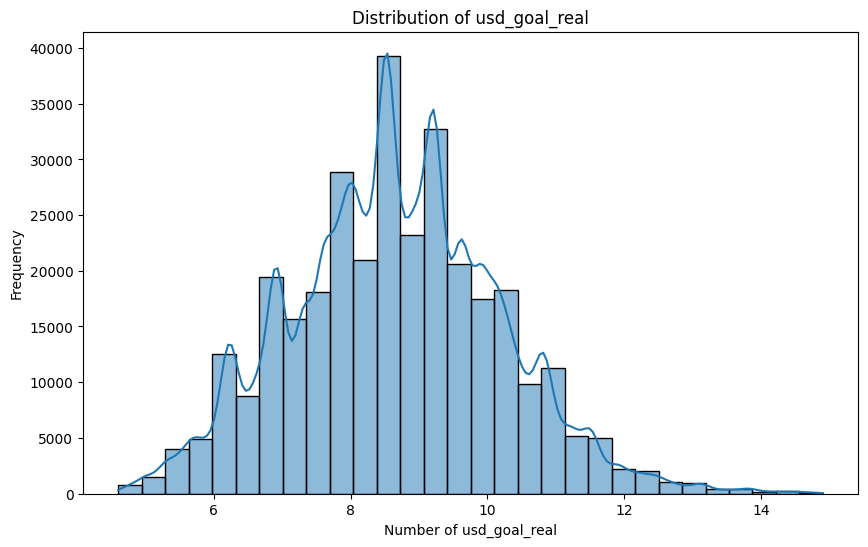

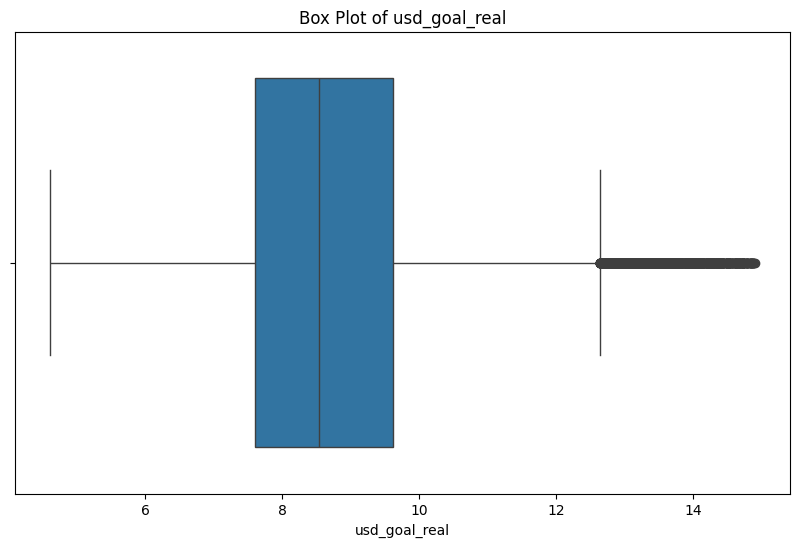

Mean: 8.66
Median: 8.54
Mode: 8.52
Range: 10.30
Minimum: 4.605570106009418
Maximum: 14.902960380807023
Standard Deviation: 1.53
Variance: 2.34
Coefficient of Variation (CV): 17.67%
Interquartile Range (IQR): 2.01


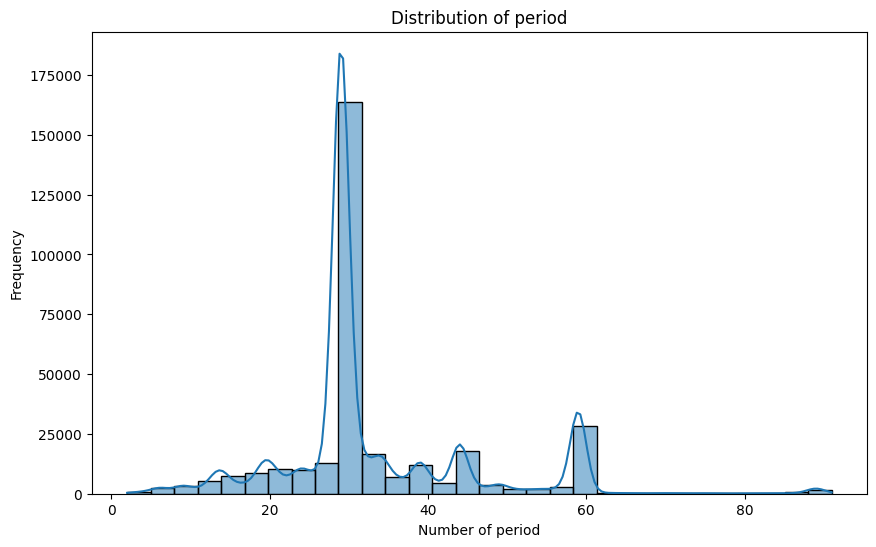

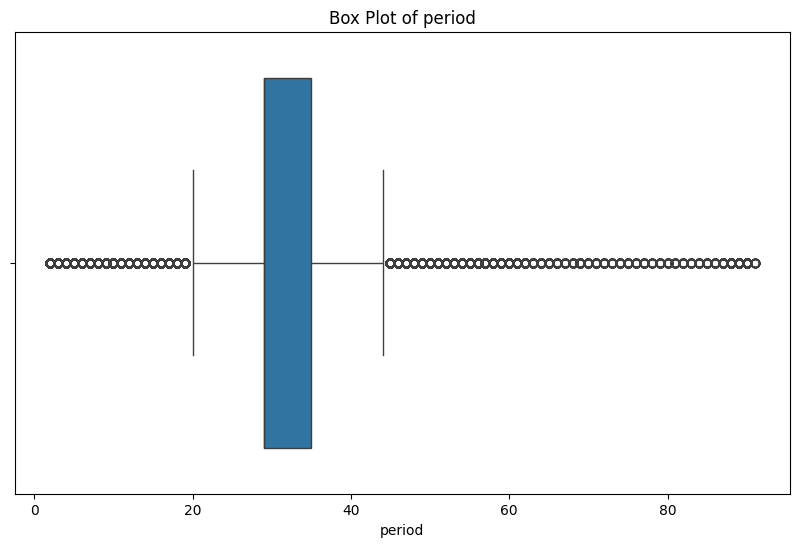

Mean: 33.06
Median: 29.00
Mode: 29.00
Range: 89.00
Minimum: 2
Maximum: 91
Standard Deviation: 12.65
Variance: 159.96
Coefficient of Variation (CV): 38.26%
Interquartile Range (IQR): 6.00


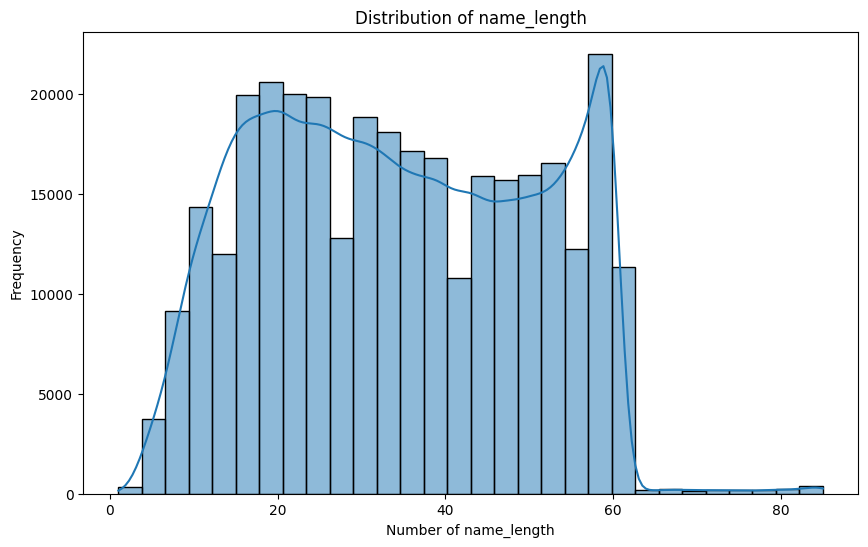

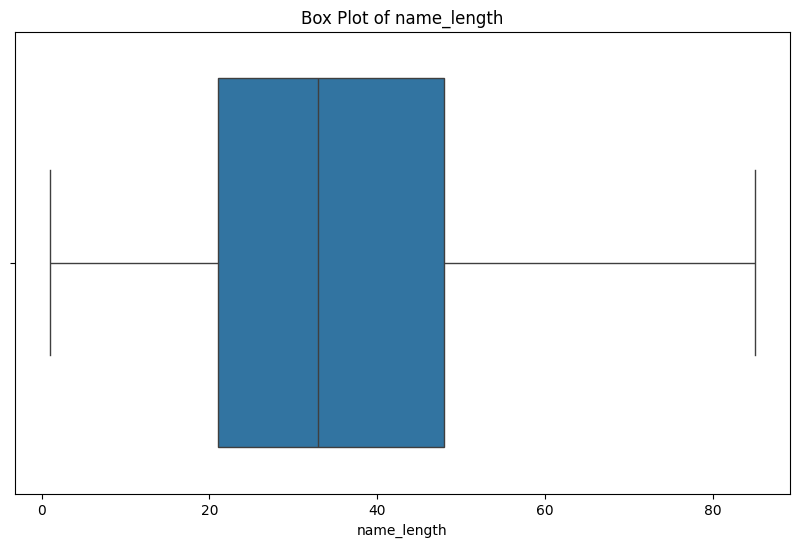

Mean: 34.30
Median: 33.00
Mode: 60.00
Range: 84.00
Minimum: 1
Maximum: 85
Standard Deviation: 15.97
Variance: 255.05
Coefficient of Variation (CV): 46.56%
Interquartile Range (IQR): 27.00


In [ ]:
# Function to remove outliers from a numerical feature using the Interquartile Range method
def remove_outliers_iqr(df, variable):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to remove outliers
    df = df[(df[variable] >= lower_bound) & (df[variable] <= upper_bound)]


# Execution and results
for feature in numerical:
  remove_outliers_iqr(df,feature)
  plot_distribution(df, feature)
  plot_boxplot(df, feature)
  show_descriptive_statistics(df[feature])

In [ ]:
df

,ID,category,main_category,currency,state,country,usd_goal_real,period,name_length,name_with_number,name_with_special_char
0,1000002330,Poetry,Publishing,GBP,False,GB,7.335601,58,31,False,True
1,1000003930,Narrative Film,Film & Video,USD,False,US,10.308953,59,45,False,True
2,1000004038,Narrative Film,Film & Video,USD,False,US,10.714418,44,14,False,True
3,1000007540,Music,Music,USD,False,US,8.517193,29,49,False,True
5,1000014025,Restaurants,Food,USD,True,US,10.819778,34,20,False,True
...,...,...,...,...,...,...,...,...,...,...,...
378654,999975836,Small Batch,Food,USD,False,US,8.779557,29,37,False,True
378657,999977640,Narrative Film,Film & Video,USD,False,US,7.313220,26,9,False,True
378658,999986353,Narrative Film,Film & Video,USD,False,US,9.615805,45,71,False,True
378659,999987933,Technology,Technology,USD,False,US,9.615805,30,24,False,True


# Data Standardization

In [ ]:
categorical = [
    'category',
    'main_category',
    'currency',
    'country'
    ]

boolean = [
    'state',
    'name_with_number',
    'name_with_special_char'
    ]

numerical = [
    'usd_goal_real',
    'period',
    'name_length'
    ]

# No ordinal variables are present among the categorical features. Use OneHotEncoder to convert each category into separate binary columns.
# Apply StandardScaler to numerical features to normalize the data, transforming it to have zero mean and unit standard deviation (Z-score normalization).

# Define a transformer that applies:
# - StandardScaler to numerical variables
# - OneHotEncoder to categorical variables
transformer = [
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(), categorical)
]

# Apply preprocessing steps using ColumnTransformer
pre_processor = ColumnTransformer(transformer)


# Creating data pipelines
Modeling

Importing Libraries

In [ ]:
# After defining preprocessing steps, build pipelines that combine:
# - the data preprocessor
# - classification models (Logistic Regression, Decision Tree, and Random Forest)

# Pipeline for Logistic Regression:
pipeline_lr = Pipeline([
    ('preprocessor', pre_processor),
    ('classifier', LogisticRegression(
        max_iter=1000,            # defines the maximum number of iterations for the solver to converge
        random_state=352))        # a fixed random state for all models to ensure reproducibility and enable fair comparison of results across runs
])

# Pipeline for Decision Tree:
pipeline_dt = Pipeline([
    ('preprocessor', pre_processor),
    ('classifier', DecisionTreeClassifier(
        criterion="gini",         # uses the Gini index to measure the quality of splits
        splitter="best",          # chooses the best split at each node
        min_samples_split=500,   # sets the minimum number of samples required to split an internal node, higher values help reduce overfitting
        random_state=352          # a fixed random state for all models to ensure reproducibility and enable fair comparison of results across runs
    ))
])

# Pipeline for Random Forest
pipeline_rf = Pipeline([
    ('preprocessor', pre_processor),
    ('classifier', RandomForestClassifier(
        n_estimators=150,         # defines the number of trees in the forest
        criterion="gini",         # uses the Gini index to measure the quality of splits
        min_samples_split=100,    # controls the minimum samples required to split a node
        n_jobs=3,                 # enables parallel processing using 3 CPU cores to improve performance
        random_state=352          # a fixed random state for all models to ensure reproducibility and enable fair comparison of results across runs
    ))
])

# Training Pipelines

In [ ]:
# Modeling

# Predictor variables used in the model
predictor_vars = categorical + numerical + ['name_with_number', 'name_with_special_char']

# Feature set (independent variables)
X = df[predictor_vars]

# Target variable (dependent variable)
y = df['state']

# Split the data into training and test sets with stratification based on the target variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=(30000 / len(X)),     # the test set size is dynamically set to 30,000 samples
    stratify=y,                     # stratification ensures the target variable distribution is preserved in both sets
    random_state=352                # a fixed random state
)

# Train the models using the training set
pipeline_lr.fit(X_train, y_train)
print('Logistic Regression training completed.')

pipeline_dt.fit(X_train, y_train)
print('Decision Tree training completed.')

pipeline_rf.fit(X_train, y_train)
print('Random Forest training completed.')



Logistic Regression training completed.
Decision Tree training completed.
Random Forest training completed.


# Results


Model Evaluation Metrics:
Logistic Regression Accuracy: 0.6771
Decision Tree Accuracy:       0.6745
Random Forest Accuracy:       0.6866

Logistic Regression Precision: 0.6705
Decision Tree Precision:       0.668
Random Forest Precision:       0.6807

Logistic Regression Recall:    0.6771
Decision Tree Recall:           0.6745
Random Forest Recall:           0.6866

Logistic Regression F1-score: 0.6685
Decision Tree F1-score:       0.6671
Random Forest F1-score:       0.6787

Logistic Regression AUC-ROC: 0.7255
Decision Tree AUC-ROC:       0.7253
Random Forest AUC-ROC:       0.745

Confusion Matrix - Logistic Regression:
 [[14413  3550]
 [ 6137  5900]]
Confusion Matrix - Decision Tree:
 [[14235  3728]
 [ 6036  6001]]
Confusion Matrix - Random Forest:
 [[14511  3452]
 [ 5949  6088]]


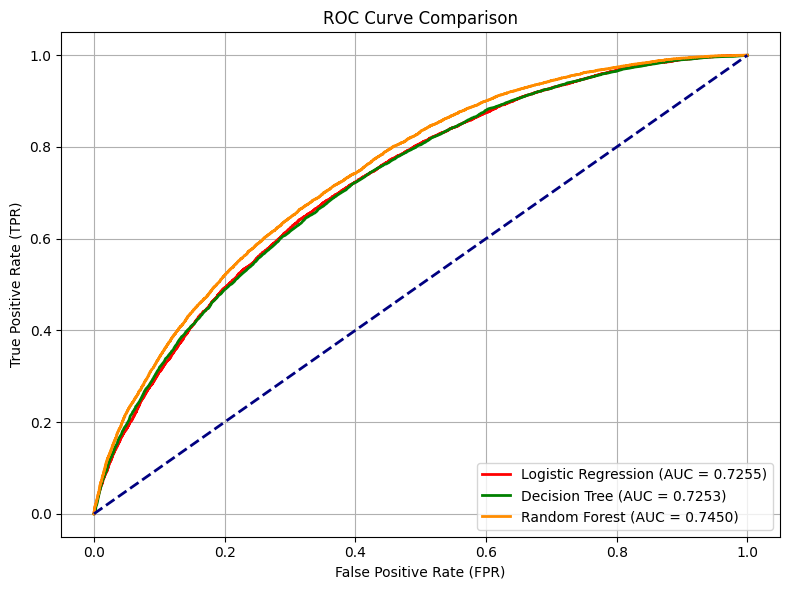

In [ ]:
# Predictions on the test set
y_pred_lr = pipeline_lr.predict(X_test)
y_pred_dt = pipeline_dt.predict(X_test)
y_pred_rf = pipeline_rf.predict(X_test)

# Evaluate the models using key metrics: Accuracy, F1-score, Precision, Recall, Confusion Matrix, and AUC-ROC
accuracy_lr = round(accuracy_score(y_test, y_pred_lr), 4)
accuracy_dt = round(accuracy_score(y_test, y_pred_dt), 4)
accuracy_rf = round(accuracy_score(y_test, y_pred_rf), 4)

f1_lr = round(f1_score(y_test, y_pred_lr, average='weighted'), 4)
f1_dt = round(f1_score(y_test, y_pred_dt, average='weighted'), 4)
f1_rf = round(f1_score(y_test, y_pred_rf, average='weighted'), 4)

precision_lr = round(precision_score(y_test, y_pred_lr, average='weighted'), 4)
precision_dt = round(precision_score(y_test, y_pred_dt, average='weighted'), 4)
precision_rf = round(precision_score(y_test, y_pred_rf, average='weighted'), 4)

recall_lr = round(recall_score(y_test, y_pred_lr, average='weighted'), 4)
recall_dt = round(recall_score(y_test, y_pred_dt, average='weighted'), 4)
recall_rf = round(recall_score(y_test, y_pred_rf, average='weighted'), 4)

conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

auc_roc_lr = round(roc_auc_score(y_test, pipeline_lr.predict_proba(X_test)[:, 1]), 4)
auc_roc_dt = round(roc_auc_score(y_test, pipeline_dt.predict_proba(X_test)[:, 1]), 4)
auc_roc_rf = round(roc_auc_score(y_test, pipeline_rf.predict_proba(X_test)[:, 1]), 4)

# Print the evaluation results
print("\nModel Evaluation Metrics:")
print(f"Logistic Regression Accuracy: {accuracy_lr}")
print(f"Decision Tree Accuracy:       {accuracy_dt}")
print(f"Random Forest Accuracy:       {accuracy_rf}")

print(f"\nLogistic Regression Precision: {precision_lr}")
print(f"Decision Tree Precision:       {precision_dt}")
print(f"Random Forest Precision:       {precision_rf}")

print(f"\nLogistic Regression Recall:    {recall_lr}")
print(f"Decision Tree Recall:           {recall_dt}")
print(f"Random Forest Recall:           {recall_rf}")

print(f"\nLogistic Regression F1-score: {f1_lr}")
print(f"Decision Tree F1-score:       {f1_dt}")
print(f"Random Forest F1-score:       {f1_rf}")

print(f"\nLogistic Regression AUC-ROC: {auc_roc_lr}")
print(f"Decision Tree AUC-ROC:       {auc_roc_dt}")
print(f"Random Forest AUC-ROC:       {auc_roc_rf}")

print("\nConfusion Matrix - Logistic Regression:\n", conf_matrix_lr)
print("Confusion Matrix - Decision Tree:\n", conf_matrix_dt)
print("Confusion Matrix - Random Forest:\n", conf_matrix_rf)


# Get predicted probabilities for the ROC curve
prob_lr = pipeline_lr.predict_proba(X_test)[:, 1]
prob_dt = pipeline_dt.predict_proba(X_test)[:, 1]
prob_rf = pipeline_rf.predict_proba(X_test)[:, 1]

# Compute ROC curve points
fpr_lr, tpr_lr, _ = roc_curve(y_test, prob_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, prob_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, prob_rf)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label=f'Logistic Regression (AUC = {auc_roc_lr:.4f})')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'Decision Tree (AUC = {auc_roc_dt:.4f})')
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest (AUC = {auc_roc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guess

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


**Model Evaluation Metrics:**

**Accuracy**

*   Logistic Regression Accuracy: 0.6771
*   Decision Tree Accuracy:       0.6745
*   Random Forest Accuracy:       0.6866

**Precision**

*   Logistic Regression Precision: 0.6705
*   Decision Tree Precision:       0.668
*   Random Forest Precision:       0.6807

**Recall**
*   Logistic Regression Recall:    0.6771
*   Decision Tree Recall:           0.6745
*   Random Forest Recall:           0.6866

**F1-score**
*   Logistic Regression F1-score: 0.6685
*   Decision Tree F1-score:       0.6671
*   Random Forest F1-score:       0.6787

**AUC-ROC**
*   Logistic Regression AUC-ROC: 0.7255
*   Decision Tree AUC-ROC:       0.7253
*   Random Forest AUC-ROC:       0.745

**Confusion Matrix - Logistic Regression:**
*   14413  |   3550
*   6137  |  5900

**Confusion Matrix - Decision Tree:**
*   14235  |  3728
*   6036   |  6001

**Confusion Matrix - Random Forest:**
*   14511 | 3452
*   5949 |  6088

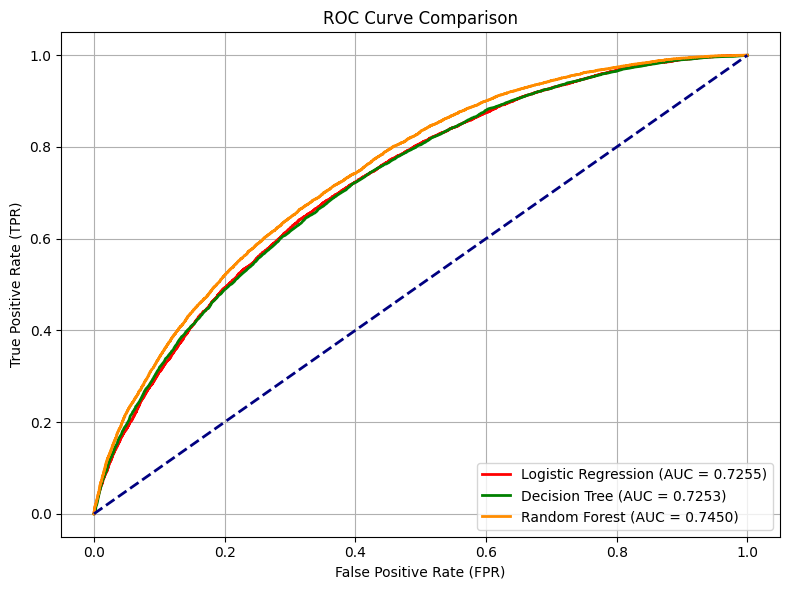

# Conclusions

Random Forest performs best, showing better generalization and class discrimination.

The model uses only static, pre-launch features and does not consider campaign dynamics.

Given this limitation, predictive performance is reasonable.

This approach is useful for early risk assessment and decision-making before the campaign starts.